In [1]:
# Import the code for the classifier in this file and run everything here
# as a testing/results interface

In [2]:
# Insert top level directory into the system path so parent and sibling 
# modules can be imported 
import pathlib
import sys

# Convert path to use proper directory markers based on 
# operating system
PATH = str(pathlib.Path('../../'))

# Insert path to system path
sys.path.insert(0, PATH)

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras import optimizers


In [5]:
# THIS IS HERE JUST AS AN EXAMPLE. YOU CAN REMOVE THIS WHEN YOU START 
# WORKING ON IT
from FootballML.Classifiers.Individual.neural_network_classifier import test_data
import FootballML.Classifiers.Individual.neural_network_classifier as nnc

In [6]:
year=2015
x,y = nnc.test_data(year,year+4) 
xtrain, xvalid, xtest, ytrain, yvalid, ytest = nnc.prep_data(x,y)


In [7]:
t=list(xtrain)
len(t)
#t[36]
#print(xtrain[0])
#t[-6:-1]+[t[-1]]
#[t[0]]+[t[1]]+[t[4]]+[t[6]]+[t[7]]+[t[12]]+[t[13]]+[t[16]]+[t[19]]+[t[21]]+[t[22]]+t[26:36]
#[t[36+0]]+[t[36+1]]+[t[36+4]]+[t[36+6]]+[t[36+7]]+[t[36+12]]+[t[36+13]]+[t[36+16]]+[t[36+19]]+[t[36+21]]+[t[36+22]]+t[36+26:36+36]

1008

################################################


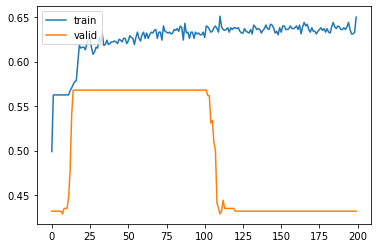

4/4 [==============================] - 0s 1ms/step - loss: 4625.7227 - accuracy: 0.4352
Test accuracy: 0.43518519401550293


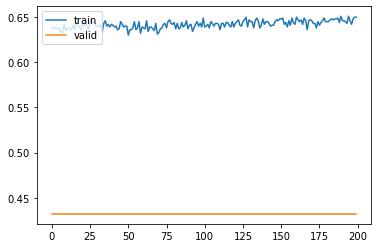

4/4 [==============================] - 0s 2ms/step - loss: 16442.0957 - accuracy: 0.4352
Test accuracy: 0.43518519401550293


In [34]:
ans=[]
i=2
l=0.0005
while i < 3:
    i*=2
    model = Sequential(
        [
            
            #layers.Dense(6),
            #layers.LeakyReLU(alpha=0.25),
            
            #layers.Dropout(0.4),
            
            layers.Dense(3),
            layers.LeakyReLU(alpha=0.25),
            
            layers.Dense(3),
            layers.LeakyReLU(alpha=0.25),
            
            layers.Dense(3),
            layers.LeakyReLU(alpha=0.25),

            #layers.Dense(8, activation='relu'),

            #layers.Dense(1, activation='sigmoid'),
            layers.Dense(2, activation='softmax')
        ]
    )

    print("################################################")

    for j in range(2):
        
        model.compile(optimizer=optimizers.Adam(learning_rate=l),
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])
        l*=0.75
        results=model.fit(xtrain, ytrain, validation_data=(xvalid,yvalid), batch_size=16, epochs=200, verbose=0)

        plt.plot(results.history['accuracy'])
        plt.plot(results.history['val_accuracy'])
        plt.legend(['train', 'valid'], loc='upper left')
        plt.show()

        test_results=model.evaluate(xtest,ytest)
        print('Test accuracy:',test_results[1])
        ans.append([i,test_results[1]])



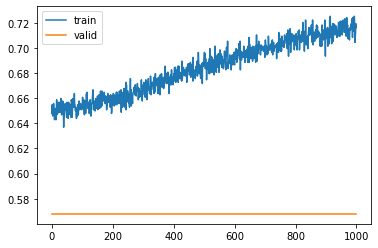

4/4 [==============================] - 0s 1ms/step - loss: 63972.2656 - accuracy: 0.5648
Test accuracy: 0.5648148059844971


In [30]:
results=model.fit(xtrain, ytrain, validation_data=(xvalid,yvalid), batch_size=16, epochs=1000, verbose=0)

plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

test_results=model.evaluate(xtest,ytest)
print('Test accuracy:',test_results[1])
ans.append([i,test_results[1]])

In [36]:
ans


[[0.00375, 0.6388888955116272],
 [0.00140625, 0.3888888955116272],
 [0.00052734375, 0.6388888955116272],
 [0.00019775390625, 0.5833333134651184],
 [7.415771484375e-05, 0.5833333134651184]]

In [12]:
import numpy as np


In [13]:
j

1

In [24]:
xtrain[1]

array([0.56713587, 0.52244666, 0.22218933, 0.39939275, 0.4803436 ,
       0.41782001, 0.59059973, 0.61720248, 0.50438414, 0.52675442,
       0.25706116, 0.65890897, 0.86472462, 0.46771716, 0.48807734,
       0.53477345, 0.7227649 , 0.35413709, 0.80543696, 0.36039784,
       1.37473157, 0.55132432, 0.57411435, 0.38133293, 0.09472584,
       0.5115276 , 0.45487856, 0.51476334, 0.64557081, 0.52644505,
       0.55569637, 0.23655247, 0.658322  , 0.83498836, 0.42165595,
       0.58084113, 0.63865403, 0.45711628, 0.30942713, 0.92882817,
       0.36037529, 0.        , 0.9024906 , 0.4767468 , 0.60433845,
       0.60556912, 0.48372269, 0.51396583])

In [23]:
(xtrain+np.random.rand(xtrain.shape[0],xtrain.shape[1])/1000)[1]

array([5.67735747e-01, 5.23262754e-01, 2.23164922e-01, 4.00064979e-01,
       4.81030872e-01, 4.18805605e-01, 5.91236453e-01, 6.17692593e-01,
       5.04996992e-01, 5.27099721e-01, 2.57095029e-01, 6.59163715e-01,
       8.65065303e-01, 4.68117484e-01, 4.88508603e-01, 5.35292708e-01,
       7.22989933e-01, 3.54678321e-01, 8.05494536e-01, 3.60652951e-01,
       1.37561353e+00, 5.51816358e-01, 5.75010313e-01, 3.81723565e-01,
       9.47630428e-02, 5.11604354e-01, 4.55158748e-01, 5.15394669e-01,
       6.45644027e-01, 5.26743149e-01, 5.56047914e-01, 2.37050063e-01,
       6.58422088e-01, 8.35302330e-01, 4.21672537e-01, 5.81246452e-01,
       6.39557130e-01, 4.57119151e-01, 3.09775846e-01, 9.29006206e-01,
       3.61323439e-01, 9.59600767e-04, 9.02891031e-01, 4.76907250e-01,
       6.04341183e-01, 6.06163181e-01, 4.84409343e-01, 5.14367019e-01])

In [ ]:
nnc.run_neural_network(2019)

In [ ]:
nnc.predict(xtest,ytest)